# Data Introduction

In [1]:
import pandas as pd

In [2]:
flowers = pd.read_csv('Iris.csv')

In [3]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
flowers.shape

(150, 5)

In [5]:
flowers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
flowers['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
flowers['species'] = flowers['species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

In [8]:
flowers.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Data Visualization

In [9]:
setosa = flowers[:50]
versicolor = flowers[50:100]
virginica = flowers[100:]

In [10]:
import matplotlib.pyplot as plt

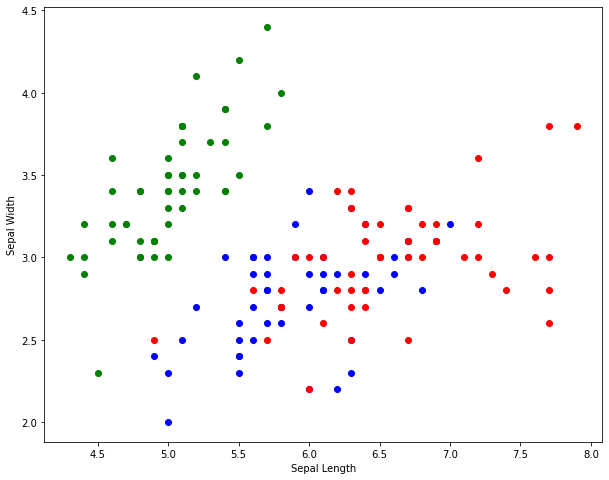

In [11]:
plt.figure(figsize = (10, 8))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(setosa['sepal_length'], setosa['sepal_width'], color = 'green', marker = 'o')
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], color = 'blue', marker = 'o')
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], color = 'red', marker = 'o')

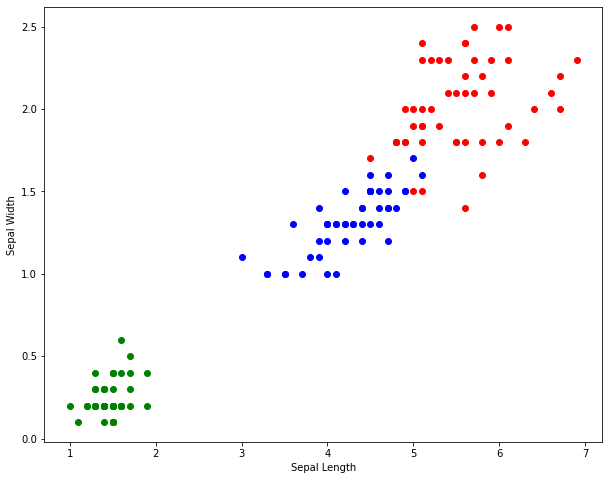

In [12]:
plt.figure(figsize = (10, 8))
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(setosa['petal_length'], setosa['petal_width'], color = 'green', marker = 'o')
plt.scatter(versicolor['petal_length'], versicolor['petal_width'], color = 'blue', marker = 'o')
plt.scatter(virginica['petal_length'], virginica['petal_width'], color = 'red', marker = 'o')

In [13]:
features = flowers.drop(['species'], axis = 1)
target = flowers['species']

# Split the Data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(features, target, train_size = 0.8, random_state = 17)

# Select and Train the Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [17]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Evaluate the Model

In [18]:
prediction = knn.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.92      1.00      0.96        11
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
the_matrix = confusion_matrix(y_test, prediction)
print(the_matrix)

[[ 7  0  0]
 [ 0 11  0]
 [ 0  1 11]]
